In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('display.max_columns', None)

In [3]:
import yfinance as yf
import bs4 as bs
import pickle
import requests
import pandas as pd
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
from  getTickers import *
import os
from pandas_datareader import data as pdr


  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [23]:
yf.pdr_override()
dow = save_dow_tickers()
print(dow)
    
data = pdr.get_data_yahoo(dow,period = "6mo", group_by='ticker')

combined_df = pd.DataFrame()
for tickers in dow:
    combined_df[tickers] = abs(data[tickers]['Close'].diff())


combined_df = combined_df.iloc[1:]
combined_df

<Response [200]>
['HD', 'MSFT', 'GS', 'JPM', 'V', 'CVX', 'MRK', 'AAPL', 'VZ', 'AMGN', 'CRM', 'PG', 'DIS', 'TRV', 'IBM', 'CAT', 'MCD', 'INTC', 'MMM', 'WBA', 'AXP', 'HON', 'WMT', 'BA', 'KO', 'UNH', 'JNJ', 'DOW', 'CSCO', 'NKE']
[*********************100%***********************]  30 of 30 completed


,HD,MSFT,GS,JPM,V,CVX,MRK,AAPL,VZ,AMGN,CRM,PG,DIS,TRV,IBM,CAT,MCD,INTC,MMM,WBA,AXP,HON,WMT,BA,KO,UNH,JNJ,DOW,CSCO,NKE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-07,2.270020,3.870010,4.020004,2.139999,2.410004,0.669998,0.030006,2.789993,0.699997,0.860001,6.739990,0.839996,0.890015,3.620003,1.160004,0.529999,1.420013,0.540001,2.330002,0.630001,3.240005,2.529999,0.619995,2.179993,0.320000,2.970001,1.050003,0.580002,0.340000,1.410004
2020-08-10,3.089996,4.229996,1.110001,1.260002,0.429993,2.930000,0.109993,1.614998,0.460003,2.520004,3.889999,0.550003,1.139999,1.760002,2.150002,7.100006,0.480011,1.190002,3.110001,1.340000,2.459999,4.319992,1.910004,9.389999,0.079998,2.070007,0.570007,2.169998,0.299999,3.550003
2020-08-11,0.190002,4.869995,1.679993,3.180000,0.980011,0.110001,0.000000,3.352501,0.480003,3.520004,5.169998,0.870010,1.700012,0.799995,0.360001,0.509995,0.880005,1.030003,1.940002,1.010002,1.639999,0.850006,1.680008,0.720001,0.209999,3.550018,1.059998,0.299999,0.540001,0.290001
2020-08-12,6.659973,5.809998,1.070007,0.879997,0.970001,1.099998,1.769997,3.635002,0.090000,7.070007,0.629990,2.230011,1.299988,1.059998,0.050003,0.040009,1.020004,1.000000,0.879990,0.029999,1.580002,0.209991,1.690002,4.690002,0.500000,6.720001,2.690002,0.220001,0.910000,0.099998
2020-08-13,0.080017,0.490005,3.740005,0.570000,1.160004,0.900002,0.860001,2.000000,0.079998,1.259995,2.520004,0.319992,0.829987,0.409996,1.669998,1.900009,0.470001,0.629997,1.600006,0.820000,1.260002,1.090012,0.039993,0.710007,0.049999,0.750000,1.660004,0.150002,5.379997,1.299995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0.750000,7.689987,3.559998,0.949997,5.110001,1.210007,0.290001,2.179993,0.470001,1.000000,2.900009,0.759995,2.800003,1.910004,1.430000,1.880005,0.089996,1.180000,0.960007,1.419998,0.769997,0.190002,1.220001,1.649994,0.329998,0.420013,0.419998,0.849998,0.820000,2.120010
2021-02-02,2.089996,0.139999,12.239990,3.990005,4.250000,0.649994,0.409996,0.850006,0.220001,0.060013,5.739990,0.180008,5.990005,1.619995,1.099998,7.779999,1.830002,1.310001,0.320007,0.390003,3.669998,4.559998,1.500000,5.100006,0.480000,4.720001,1.460007,1.860001,0.430000,3.879990
2021-02-03,2.010010,3.490005,1.579987,1.529999,1.250000,1.900002,0.449997,1.050003,0.290001,3.410004,0.620010,0.160004,0.530014,1.169998,0.320000,1.050003,1.049988,0.320000,0.459991,0.460003,0.259995,0.979996,0.429993,6.449997,0.189999,0.829987,0.750000,0.739998,0.060001,0.959991


In [24]:
combined_df = combined_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)
combined_df

<ipython-input-24-7193526788a8>:1: RuntimeWarning: divide by zero encountered in log
  combined_df = combined_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)


,HD,MSFT,GS,JPM,V,CVX,MRK,AAPL,VZ,AMGN,CRM,PG,DIS,TRV,IBM,CAT,MCD,INTC,MMM,WBA,AXP,HON,WMT,BA,KO,UNH,JNJ,DOW,CSCO,NKE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-07,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0
2020-08-10,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1
2020-08-11,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2020-08-12,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0
2020-08-13,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2021-02-02,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1
2021-02-03,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
combined_df.corr()

,HD,MSFT,GS,JPM,V,CVX,MRK,AAPL,VZ,AMGN,...,AXP,HON,WMT,BA,KO,UNH,JNJ,DOW,CSCO,NKE
HD,1.000000,0.014153,0.085617,0.047178,0.070807,-0.123024,-0.164614,0.029235,-0.131559,-0.034996,...,-0.030576,0.091346,-0.081100,0.123024,0.022780,-0.034996,-0.065372,0.110577,-0.166478,0.093011
MSFT,0.014153,1.000000,0.037341,-0.166667,0.127912,-0.027507,-0.140694,-0.009563,-0.107583,0.117073,...,-0.170549,-0.051896,-0.041323,0.155871,-0.033531,0.182634,-0.160375,-0.245327,-0.210042,-0.055692
GS,0.085617,0.037341,1.000000,0.037341,-0.000796,0.054694,0.013134,-0.007231,-0.043386,-0.007869,...,0.132941,-0.014270,-0.028546,0.139432,-0.052962,0.157378,-0.048507,-0.085617,0.058824,0.017936
JPM,0.047178,-0.166667,0.037341,1.000000,0.094749,0.068767,0.187592,0.057378,-0.032275,0.051512,...,0.326886,0.047178,-0.009183,-0.068767,0.013412,-0.014049,0.032075,0.117946,0.070014,-0.088179
V,0.070807,0.127912,-0.000796,0.094749,1.000000,0.123276,-0.025773,0.110089,-0.135776,0.045258,...,0.015890,0.003218,0.065516,-0.123276,0.016393,0.078802,0.049233,-0.070807,-0.027862,0.074139
CVX,-0.123024,-0.027507,0.054694,0.068767,0.123276,1.000000,0.181461,-0.007102,0.081675,0.136541,...,0.123276,0.007786,0.113413,-0.173770,0.128756,-0.058223,0.174691,0.188429,0.042369,-0.107488
MRK,-0.164614,-0.140694,0.013134,0.187592,-0.025773,0.181461,1.000000,-0.008073,0.121090,-0.144070,...,0.123531,0.058412,0.124890,0.035260,0.081771,-0.180967,0.270765,0.015930,0.170743,-0.040919
AAPL,0.029235,-0.009563,-0.007231,0.057378,0.110089,-0.007102,-0.008073,1.000000,-0.066667,0.004837,...,0.075839,0.097451,-0.135147,-0.125472,0.003463,-0.096730,-0.016563,0.107196,-0.108465,-0.064708
VZ,-0.131559,-0.107583,-0.043386,-0.032275,-0.135776,0.081675,0.121090,-0.066667,1.000000,-0.123331,...,0.095410,-0.054816,0.135147,-0.081675,0.348034,-0.047156,0.223607,0.285044,0.108465,0.039544
AMGN,-0.034996,0.117073,-0.007869,0.051512,0.045258,0.136541,-0.144070,0.004837,-0.123331,1.000000,...,-0.122463,-0.001591,-0.110946,-0.104080,-0.012059,-0.094211,-0.032444,-0.031814,-0.157378,0.064679


In [18]:
sp500tic = save_sp500_tickers()
print(sp500tic)

data = pdr.get_data_yahoo(sp500tic,period = "6mo", group_by='ticker')

sp500corr_df = pd.DataFrame()
for tickers in sp500tic:
    sp500corr_df[tickers] = abs(data[tickers]['Close'].diff())

sp500corr_df = sp500corr_df[1:]
sp500corr_df

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,0.519997,0.349998,4.160004,0.669998,4.369995,14.539978,1.860001,0.139999,0.610001,1.110001,...,2.470001,2.239998,0.410000,1.200005,1.360001,0.169998,3.690002,6.389999,1.220001,2.449997
2020-08-10,1.190002,0.540001,10.800018,1.220001,0.209999,6.279999,2.610001,1.350006,0.430000,0.950001,...,7.380005,0.110001,1.070000,1.010002,1.849998,0.519997,2.630005,1.000000,0.910000,0.790009
2020-08-11,0.980003,0.290001,5.149994,1.769989,3.139999,8.059998,5.360001,1.380005,0.610001,0.559998,...,6.809998,1.930000,0.139999,1.839996,1.300003,1.360001,0.160004,0.169998,0.689999,1.160004
2020-08-12,1.590004,2.840004,7.470001,1.179993,2.589996,10.129974,5.730003,2.339996,0.280001,0.410000,...,2.489998,0.960007,0.390001,1.430000,0.200005,0.460007,3.440002,0.369995,0.700001,2.430008
2020-08-13,0.449997,0.830002,6.029999,1.979996,0.419998,4.660004,0.770004,1.710007,0.530001,0.130001,...,0.869995,0.200005,0.200001,0.540001,0.619995,0.390007,1.599976,0.669998,0.430000,0.490005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,1.049995,0.180000,6.390015,5.650009,0.419998,11.230011,2.020004,1.830002,0.420000,0.430000,...,2.230003,0.050003,1.559999,4.739990,0.550003,1.570000,9.500000,0.229996,0.560001,1.330002
2021-02-02,2.300003,1.169998,5.980011,1.179993,2.560005,14.929993,1.199997,3.110001,0.940001,0.700001,...,4.339996,0.259998,0.260000,2.000000,0.040001,3.240005,7.860016,4.600006,1.099998,1.809998
2021-02-03,0.019997,3.479996,21.609985,0.380005,1.210007,3.009979,0.970001,1.199997,0.100000,0.420002,...,2.320000,1.019997,0.719999,1.919998,2.059998,1.570000,1.500000,0.059998,0.230000,2.160004


In [19]:
sp500corr_df = sp500corr_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)
sp500corr_df

<ipython-input-19-9bc6ce68c6b4>:1: RuntimeWarning: divide by zero encountered in log
  sp500corr_df = sp500corr_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)


,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,0,0,1,0,1,1,1,0,0,0,...,1,1,0,0,0,0,1,1,0,1
2020-08-10,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2020-08-11,0,0,1,1,1,1,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2020-08-12,0,1,1,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2020-08-13,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0,0,1,1,0,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2021-02-02,1,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,0,1
2021-02-03,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


<AxesSubplot:>

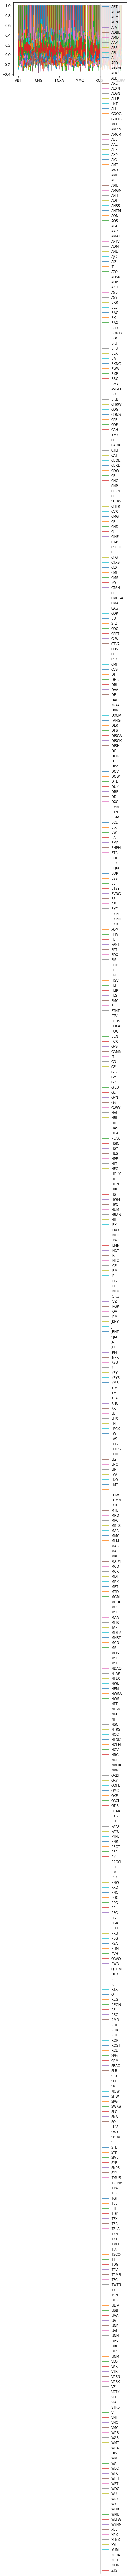

In [21]:
sp500corr_df.corr().plot()